In [44]:
import cv2
import numpy as np
import os
import shutil
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential

In [45]:
File_path = "chestXray/metadata.csv"
imgaes_path = "chestXray/images"

In [46]:
df = pd.read_csv(File_path)
df.shape

(372, 29)

In [47]:
filenames = []
finding_1 = []

In [49]:
target_dir = "Data/train"

if not os.path.exists(target_dir):
    os.mkdir(target_dir)
    print("covid directory created")

covid directory created


In [50]:
cnt = 0

for (i,row) in df.iterrows():
    if(row["view"] == "PA"):
            filename = row["filename"]
            filenames.append(filename)
            finding_1.append(1)
            image_path = os.path.join(imgaes_path, filename)
            image_copy_path = os.path.join(target_dir, filename)
            shutil.copy2(image_path , image_copy_path)
            cnt += 1
            
print(cnt)

195


In [51]:
df.shape

(372, 29)

In [52]:
import random

kaggle_file_path = "C:/Users/saigi/Downloads/kaggle_data/chest_xray/train/NORMAL"
target_normal = "Data/train"


In [53]:
image_names = os.listdir(kaggle_file_path)

In [54]:
random.shuffle(image_names)

In [55]:
cnt =0;
i=0
for filename in image_names:
    image_path = os.path.join(kaggle_file_path, filename)
    normal_path = os.path.join(target_normal, filename)
    filenames.append(filename)
    finding_1.append(0)
    #print(normal_path)
    cnt += 1
    shutil.copy2(image_path , normal_path)
    if(cnt == 195):
        break
print(cnt)

195


In [56]:
Dic = {
    "filename" : filenames,
    "finding": finding_1
}

covid_data_csv = pd.DataFrame(Dic)
covid_data_csv.to_csv("xray_train.csv")

In [57]:
covid_data_images = "Data/train"

In [58]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size= 1, seed=1, target_w = 550, target_h = 600):

    print("getting train generator...") 
    # normalize images
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
    return generator

In [59]:
train_generator = get_train_generator(covid_data_csv, covid_data_images,'filename', 'finding')

getting train generator...
Found 390 validated image filenames.


In [18]:
x, y = train_generator.__getitem__(0)

In [19]:
x, y = train_generator.__getitem__(20)

In [60]:
train_df = covid_data_csv

In [73]:
kaggle_file_path = "C:/Users/saigi/Downloads/kaggle_data/chest_xray/chest_xray/test/NORMAL"
target_normal = "Data/test"
image_names = os.listdir(kaggle_file_path)
test_filename = []
test_finding = []
cnt =0;
for filename in image_names:
    image_path = os.path.join(kaggle_file_path, filename)
    normal_path = os.path.join(target_normal, filename)
    test_filename.append(filename)
    test_finding.append(0)
    cnt += 1
    shutil.copy2(image_path , normal_path)
    print(normal_path)
    if(cnt == 100):
        break
print(cnt)

Data/test\IM-0001-0001.jpeg
Data/test\IM-0003-0001.jpeg
Data/test\IM-0005-0001.jpeg
Data/test\IM-0006-0001.jpeg
Data/test\IM-0007-0001.jpeg
Data/test\IM-0009-0001.jpeg
Data/test\IM-0010-0001.jpeg
Data/test\IM-0011-0001-0001.jpeg
Data/test\IM-0011-0001-0002.jpeg
Data/test\IM-0011-0001.jpeg
Data/test\IM-0013-0001.jpeg
Data/test\IM-0015-0001.jpeg
Data/test\IM-0016-0001.jpeg
Data/test\IM-0017-0001.jpeg
Data/test\IM-0019-0001.jpeg
Data/test\IM-0021-0001.jpeg
Data/test\IM-0022-0001.jpeg
Data/test\IM-0023-0001.jpeg
Data/test\IM-0025-0001.jpeg
Data/test\IM-0027-0001.jpeg
Data/test\IM-0028-0001.jpeg
Data/test\IM-0029-0001.jpeg
Data/test\IM-0030-0001.jpeg
Data/test\IM-0031-0001.jpeg
Data/test\IM-0033-0001-0001.jpeg
Data/test\IM-0033-0001-0002.jpeg
Data/test\IM-0033-0001.jpeg
Data/test\IM-0035-0001.jpeg
Data/test\IM-0036-0001.jpeg
Data/test\IM-0037-0001.jpeg
Data/test\IM-0039-0001.jpeg
Data/test\IM-0041-0001.jpeg
Data/test\IM-0043-0001.jpeg
Data/test\IM-0045-0001.jpeg
Data/test\IM-0046-0001.jpeg


In [22]:
df['finding'].unique()

array(['COVID-19', 'ARDS', 'SARS', 'Pneumocystis', 'Streptococcus',
       'No Finding', 'Chlamydophila', 'E.Coli', 'COVID-19, ARDS',
       'Klebsiella', 'Legionella'], dtype=object)

In [74]:
cnt =0
for (i,row) in df.iterrows():
    if(row['finding'] == "COVID-19" and row["view"] == "PA"):
            filename = row["filename"]
            test_filename.append(filename)
            test_finding.append(1)
            image_path = os.path.join(imgaes_path, filename)
            image_copy_path = os.path.join(target_normal, filename)
            print(image_copy_path)
            shutil.copy2(image_path , image_copy_path)
            cnt += 1
    if(cnt == 100):
        break
            
            
print(cnt)

Data/test\auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
Data/test\auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
Data/test\auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
Data/test\auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
Data/test\nejmc2001573_f1a.jpeg
Data/test\nejmc2001573_f1b.jpeg
Data/test\lancet-case2a.jpg
Data/test\lancet-case2b.jpg
Data/test\1-s2.0-S0140673620303706-fx1_lrg.jpg
Data/test\nCoV-radiol.2020200269.fig1-day7.jpeg
Data/test\nejmoa2001191_f1-PA.jpeg
Data/test\nejmoa2001191_f3-PA.jpeg
Data/test\nejmoa2001191_f4.jpeg
Data/test\nejmoa2001191_f5-PA.jpeg
Data/test\ryct.2020200034.fig2.jpeg
Data/test\ryct.2020200034.fig5-day0.jpeg
Data/test\ryct.2020200034.fig5-day4.jpeg
Data/test\ryct.2020200034.fig5-day7.jpeg
Data/test\ryct.2020200028.fig1a.jpeg
Data/test\radiol.2020200490.fig3.jpeg
Data/test\covid-19-pneumonia-15-PA.jpg
Data/test\covid-19-pneumonia-2.jpg
Data/test\covid-

In [70]:
Dic = {
    "filename" : test_filename,
    "finding" : test_finding
}
test_df = pd.DataFrame(Dic)
test_df.to_csv("Xray_test.csv")
test_df.shape

(200, 2)

In [67]:
def get_test_and_valid_generator(test_df, train_df,IMAGE_DIR, image_dir, x_col, y_cols, sample_size=100, batch_size=1, seed=1, target_w = 320, target_h = 320):
    
    print("getting train and valid generators...")
    # get generator to sample dataset
    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df, 
        directory=IMAGE_DIR, 
        x_col=x_col, 
        y_col=y_cols, 
        class_mode="raw", 
        batch_size=sample_size, 
        shuffle=True, 
        target_size=(target_w, target_h))
    
    # get data sample
    batch = raw_train_generator.next()
    data_sample = batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)
    
    # fit generator to sample from training data
    image_generator.fit(data_sample)

    # get test generator

    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    return test_generator

In [68]:
test_generator= get_test_and_valid_generator(test_df, train_df,covid_data_images,target_normal, "filename", "finding")

getting train and valid generators...
Found 390 validated image filenames.
Found 200 validated image filenames.


In [29]:
test_generator= get_test_and_valid_generator(test2_df, train_df,covid_data_images,target_normal, "filename", "finding")

getting train and valid generators...
Found 282 validated image filenames.
Found 8 validated image filenames.


In [30]:
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense
from tensorflow.keras.models import Model

In [32]:
predicted_vals = model.predict_generator(test_generator, steps = len(test_generator))
prediction = model.evaluate(test_generator, steps = len(test_generator))

Instructions for updating:
Please use Model.predict, which supports generators.
  ...
    to  
  ['...']
8/8 [==============================] - 5s 613ms/step - loss: 1.1921e-07 - accuracy: 0.1250


In [33]:
print(prediction)
predict_val = []
for i in predicted_vals:
    if(i >= 0.3):
        predict_val.append(1)
    else:
        predict_val.append(0)
predict_val

[1.1920930376163597e-07, 0.125]


[1, 1, 1, 1, 0, 1, 1, 0]

In [35]:
test_df.shape

(149, 2)

In [39]:

model=Sequential([
    Conv2D(64,(3,3),input_shape=(600,550,3)),
    MaxPooling2D(pool_size=(2,2),padding='SAME'),
    Dropout(0.2),
    Conv2D(64,(3,3),input_shape=(600,550,3)),
    MaxPooling2D(pool_size=(2,2),padding='SAME'),
    Dropout(0.2),
    Conv2D(128,(3,3),input_shape=(600,550,3)),
    MaxPooling2D(pool_size=(2,2),padding='SAME'),
    Dropout(0.2),
    Conv2D(128,(3,3),input_shape=(600,550,3)),
    MaxPooling2D(pool_size=(2,2),padding='SAME'),
    Dropout(0.2),
    Conv2D(256,(3,3),input_shape=(600,550,3)),
    MaxPooling2D(pool_size=(2,2),padding='SAME'),
    Dropout(0.2),
    Conv2D(256,(3,3),input_shape=(600,550,3)),
    MaxPooling2D(pool_size=(2,2),padding='SAME'),
    Dropout(0.2),
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(1,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  ...
    to  
  ['...']
Train for 100 steps
Epoch 1/3
100/100 [==============================] - 110s 1s/step - loss: 0.0000e+00 - accuracy: 0.5700
Epoch 2/3
100/100 [==============================] - 106s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 3/3
100/100 [==============================] - 105s 1s/step - loss: nan - accuracy: 0.5200


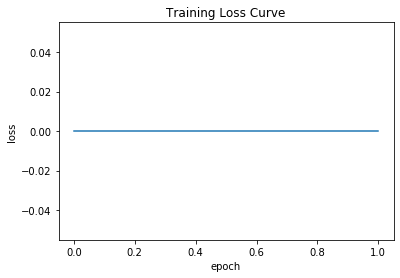

In [40]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs = 3)

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

In [ ]:
target_normal = "test_data/covid_data"
test2_filename = []
test2_finding = []
cnt = 0
for (i,row) in df.iterrows():
    if(row['finding'] == "SARS" and row["view"] == "PA"):
            filename = row["filename"]
            test2_filename.append(filename)
            test2_finding.append(1)
            image_path = os.path.join(imgaes_path, filename)
            image_copy_path = os.path.join(target_normal, filename)
            shutil.copy2(image_path , image_copy_path)
            cnt += 1
            
            
print(cnt)